In [1]:
from networkx.generators.random_graphs import connected_watts_strogatz_graph
import networkx as nx
from random import random, sample
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

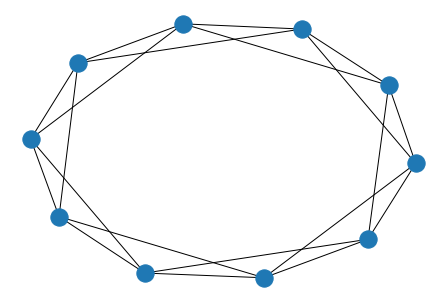

In [17]:
nx.draw(connected_watts_strogatz_graph(n=10, k=4, p=0))

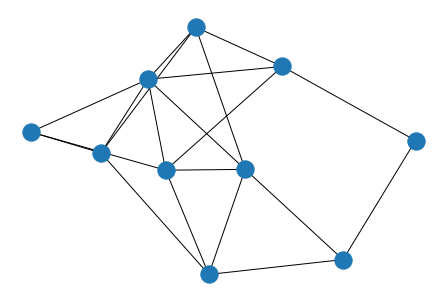

In [16]:
nx.draw(connected_watts_strogatz_graph(n=10, k=4, p=0.5))

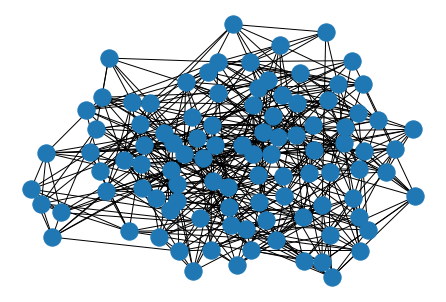

In [18]:
nx.draw(connected_watts_strogatz_graph(n=100, k=10, p=0.5))

In [48]:
g = connected_watts_strogatz_graph(n=1000, k=50, p=0.1).to_directed()

In [49]:
def step_posts(g, yesterday_posts=None, intrinsic=0.25, network_effect=0.03):
    today_posts = defaultdict(int)
    # baseline
    for v in g.nodes:
        today_posts[v] = intrinsic * random()
    # network effect
    if yesterday_posts is not None:
        for (v1, v2) in g.edges:
            today_posts[v2] += yesterday_posts[v1] * network_effect * random()
    return today_posts

In [50]:
T = 100
posts_series = []
for t in range(T):
    posts = step_posts(g, None if len(posts_series) == 0 else posts_series[-1])
    posts_series.append(posts)

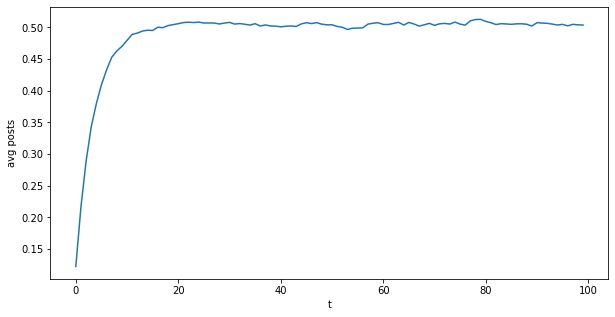

In [51]:
avg_posts = [np.mean(list(posts.values())) for posts in posts_series]

plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('avg posts')
plt.plot(avg_posts)
plt.show()

In [27]:
np.mean(avg_posts[20:])

0.5040494951777046

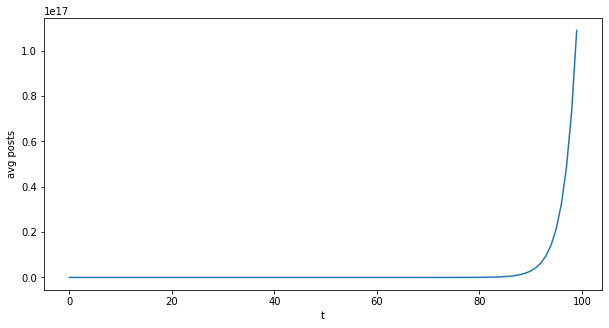

In [29]:
g = connected_watts_strogatz_graph(n=1000, k=100, p=0.1).to_directed()

def step_posts(g, yesterday_posts=None, intrinsic=0.25, network_effect=0.03):
    today_posts = defaultdict(int)
    # baseline
    for v in g.nodes:
        today_posts[v] = intrinsic * random()
    # network effect
    if yesterday_posts is not None:
        for (v1, v2) in g.edges:
            today_posts[v2] += yesterday_posts[v1] * network_effect * random()
    return today_posts

posts_series = []
for t in range(T):
    posts = step_posts(g, None if len(posts_series) == 0 else posts_series[-1])
    posts_series.append(posts)

avg_posts = [np.mean(list(posts.values())) for posts in posts_series]

plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('avg posts')
plt.plot(avg_posts)
plt.show()

In [52]:
g = connected_watts_strogatz_graph(n=100*1000, k=50, p=0.1).to_directed()
N = 1000
population_A = set(sample(g.nodes, N))
effect_size = 0.05

def step_posts(g, yesterday_posts=None, intrinsic=0.25, network_effect=0.03):
    today_posts = defaultdict(int)
    # baseline
    for v in g.nodes:
        if v in population_A:
            # experiment
            today_posts[v] = intrinsic * random() * (1 + effect_size)
        else:
            today_posts[v] = intrinsic * random()
    # network effect
    if yesterday_posts is not None:
        for (v1, v2) in g.edges:
            today_posts[v2] += yesterday_posts[v1] * network_effect * random()
    return today_posts

posts_series = []
for t in range(T):
    posts = step_posts(g, None if len(posts_series) == 0 else posts_series[-1])
    posts_series.append(posts)

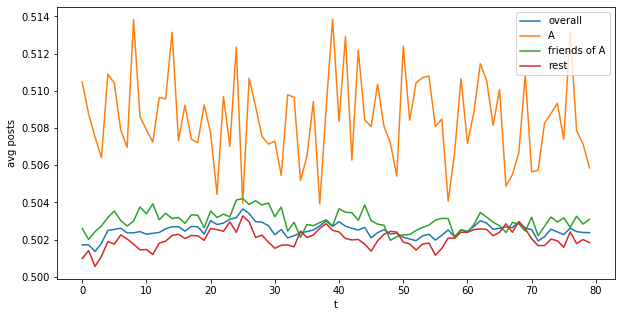

In [53]:
friends_of_A = set([])
for (v1, v2) in g.edges:
    if v1 in population_A and v2 not in population_A:
        friends_of_A.add(v2)
rest = set(g.nodes) - population_A
rest = rest - friends_of_A

avg_posts_all = []
avg_posts_A = []
avg_posts_A_friends = []
avg_posts_except_A = []
avg_posts_rest = []

for posts in posts_series[20:]:
    avg_posts_all.append(np.mean(list(posts.values())))
    avg_posts_A.append(np.mean([v for (k, v) in posts.items() if k in population_A]))
    avg_posts_A_friends.append(np.mean([v for (k, v) in posts.items() if k in friends_of_A]))
    avg_posts_except_A.append(np.mean([v for (k, v) in posts.items() if k not in population_A]))
    avg_posts_rest.append(np.mean([v for (k, v) in posts.items() if k in rest]))
            
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('avg posts')
plt.plot(avg_posts_all)
plt.plot(avg_posts_A)
plt.plot(avg_posts_A_friends)
plt.plot(avg_posts_rest)
plt.legend([
    'overall',
    'A',
    'friends of A',
    'rest',
], loc='upper right')
plt.show()

In [73]:
base = 0.5
def lift(a): return ((np.mean(a)/base-1)*100)
print("A lift: %.3f%%" % lift(avg_posts_A))
print("Friends of A lift: %.3f%%" % lift(avg_posts_A_friends))
print("Rest lift: %.3f%%" % lift(avg_posts_rest))
print("Overall lift: %.3f%%" % lift(avg_posts_all))

A lift: 1.702%
Friends of A lift: 0.605%
Rest lift: 0.411%
Overall lift: 0.501%


In [74]:
posts_series = []
for t in range(T):
    posts = step_posts(g, None if len(posts_series) == 0 else posts_series[-1], network_effect=0.01)
    posts_series.append(posts)

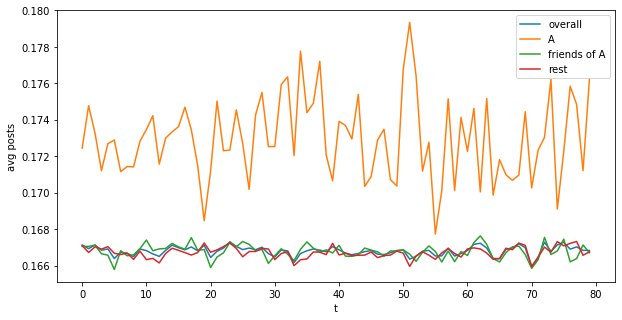

In [76]:
avg_posts_all = []
avg_posts_A = []
avg_posts_A_friends = []
avg_posts_except_A = []
avg_posts_rest = []

for posts in posts_series[20:]:
    avg_posts_all.append(np.mean(list(posts.values())))
    avg_posts_A.append(np.mean([v for (k, v) in posts.items() if k in population_A]))
    avg_posts_A_friends.append(np.mean([v for (k, v) in posts.items() if k in friends_of_A]))
    avg_posts_except_A.append(np.mean([v for (k, v) in posts.items() if k not in population_A]))
    avg_posts_rest.append(np.mean([v for (k, v) in posts.items() if k in rest]))
            
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('avg posts')
plt.plot(avg_posts_all)
plt.plot(avg_posts_A)
plt.plot(avg_posts_A_friends)
plt.plot(avg_posts_rest)
plt.legend([
    'overall',
    'A',
    'friends of A',
    'rest',
], loc='upper right')
plt.show()

In [77]:
base = 0.16666
def lift(a): return ((np.mean(a)/base-1)*100)
print("A lift: %.3f%%" % lift(avg_posts_A))
print("Friends of A lift: %.3f%%" % lift(avg_posts_A_friends))
print("Rest lift: %.3f%%" % lift(avg_posts_rest))
print("Overall lift: %.3f%%" % lift(avg_posts_all))

A lift: 3.777%
Friends of A lift: 0.070%
Rest lift: 0.032%
Overall lift: 0.085%


In [95]:
def ratio_AA_friendship(g, population_A):
    num_AA_edges = sum([(v1 in population_A and v2 in population_A) for (v1, v2) in g.edges])
    num_A_edges = sum([(v1 in population_A) for (v1, _) in g.edges])
    return num_AA_edges / num_A_edges

print('%.2f'% ratio_AA_friendship(g, set(sample(g.nodes, N))))
print('%.2f'% ratio_AA_friendship(g, set(list(g.nodes)[:N])))

0.01
0.89


In [79]:
population_A = set(list(g.nodes)[:N]) # set(sample(g.nodes, N))
effect_size = 0.05

posts_series = []
for t in range(T):
    posts = step_posts(g, None if len(posts_series) == 0 else posts_series[-1])
    posts_series.append(posts)

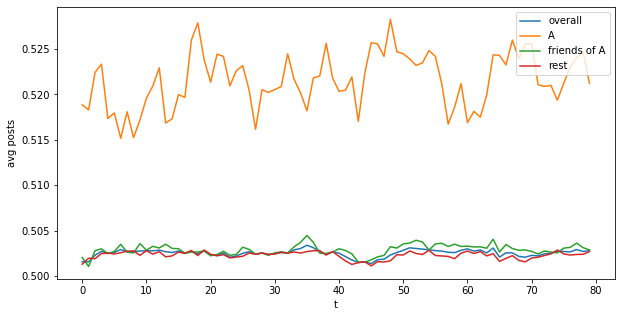

In [80]:
avg_posts_all = []
avg_posts_A = []
avg_posts_A_friends = []
avg_posts_except_A = []
avg_posts_rest = []

for posts in posts_series[20:]:
    avg_posts_all.append(np.mean(list(posts.values())))
    avg_posts_A.append(np.mean([v for (k, v) in posts.items() if k in population_A]))
    avg_posts_A_friends.append(np.mean([v for (k, v) in posts.items() if k in friends_of_A]))
    avg_posts_except_A.append(np.mean([v for (k, v) in posts.items() if k not in population_A]))
    avg_posts_rest.append(np.mean([v for (k, v) in posts.items() if k in rest]))
            
plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('avg posts')
plt.plot(avg_posts_all)
plt.plot(avg_posts_A)
plt.plot(avg_posts_A_friends)
plt.plot(avg_posts_rest)
plt.legend([
    'overall',
    'A',
    'friends of A',
    'rest',
], loc='upper right')
plt.show()

In [81]:
base = 0.5
def lift(a): return ((np.mean(a)/base-1)*100)
print("A lift: %.3f%%" % lift(avg_posts_A))
print("Friends of A lift: %.3f%%" % lift(avg_posts_A_friends))
print("Rest lift: %.3f%%" % lift(avg_posts_rest))
print("Overall lift: %.3f%%" % lift(avg_posts_all))

A lift: 4.307%
Friends of A lift: 0.579%
Rest lift: 0.460%
Overall lift: 0.508%
